
Train Accuracy     : 0.9089015151515152
Validation Accuracy: 0.9022727272727272


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       660
           1       0.86      0.92      0.89       660
           2       0.97      0.90      0.93       660
           3       0.93      0.90      0.92       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



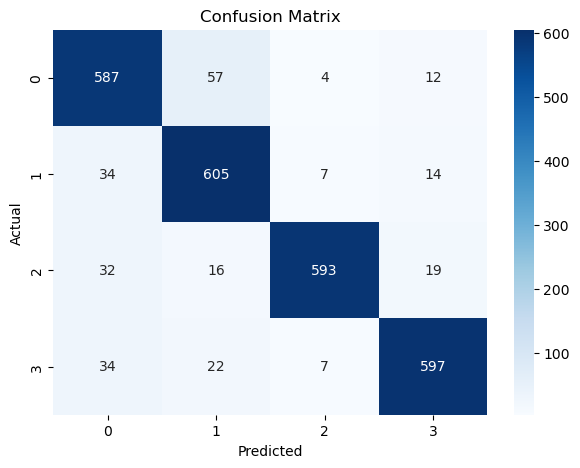

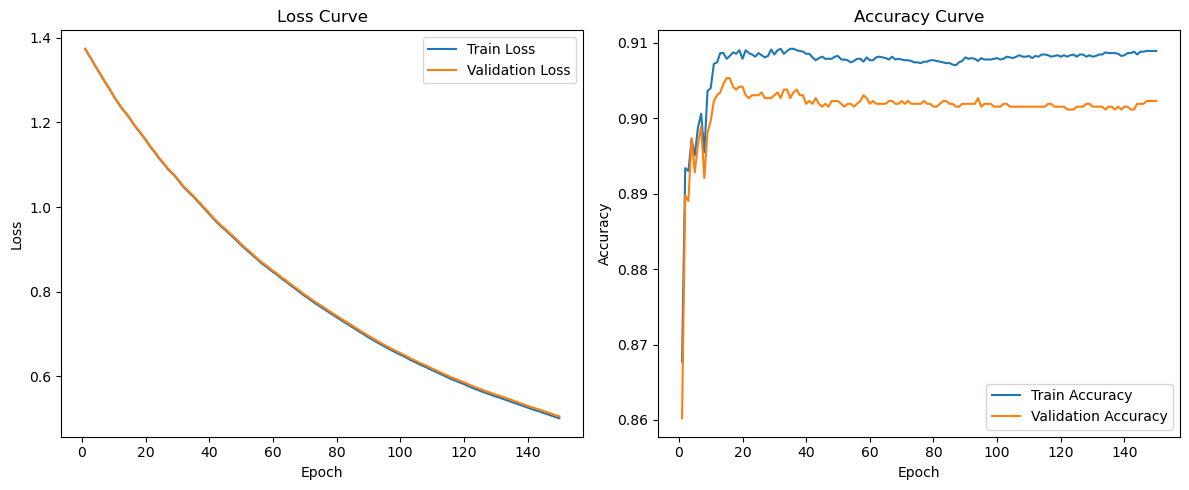

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\AI Engineering\Level 3\AI-Based Programming\Project\df_clean.csv")

X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
#   XGBoost Classifier
# ============================
model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.01,

    max_depth=3,
    min_child_weight=7,
    gamma=2,

    subsample=0.6,
    colsample_bytree=0.6,

    reg_alpha=2,
    reg_lambda=5,

    objective="multi:softprob",
    num_class=len(y.unique()),
    eval_metric=["mlogloss", "merror"],

    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)

# ============================
#     Extract Logs
# ============================
evals = model.evals_result()

train_error = evals["validation_0"]["merror"]
val_error   = evals["validation_1"]["merror"]

train_acc = 1 - train_error[-1]
val_acc   = 1 - val_error[-1]

print("\n==========================")
print("Train Accuracy     :", train_acc)
print("Validation Accuracy:", val_acc)
print("==========================\n")

# ============================
#     Prediction & Metrics
# ============================
y_pred = model.predict(X_val)

print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================
#       Visualization
# ============================

train_loss = evals["validation_0"]["mlogloss"]
val_loss   = evals["validation_1"]["mlogloss"]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,5))

# Loss Curve
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy Curve
train_acc_curve = [1 - e for e in train_error]
val_acc_curve   = [1 - e for e in val_error]

plt.subplot(1,2,2)
plt.plot(epochs, train_acc_curve, label="Train Accuracy")
plt.plot(epochs, val_acc_curve, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Model After Optimization (Genetic Algorithm)


=== BEFORE OPTIMIZER ===
Train Accuracy: 0.9089015151515152
Val Accuracy  : 0.9022727272727272


=== Generation 1 ===
Train=0.9698, Val=0.9167 → {'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.25293021772168356, 'subsample': 0.7582724016118912, 'colsample_bytree': 0.8005664086879498, 'reg_alpha': 2.936381003808858, 'reg_lambda': 3.3630495961225564, 'learning_rate': 0.09253943402569503, 'n_estimators': 489}
Train=0.9163, Val=0.9098 → {'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.8765322773059587, 'subsample': 0.5868223623391744, 'colsample_bytree': 0.752889244549496, 'reg_alpha': 2.8795825571464806, 'reg_lambda': 0.15839227548736456, 'learning_rate': 0.055114705797339084, 'n_estimators': 194}
Train=0.9268, Val=0.9129 → {'max_depth': 8, 'min_child_weight': 6, 'gamma': 2.557021135696348, 'subsample': 0.5777809520475972, 'colsample_bytree': 0.9805221744654027, 'reg_alpha': 2.307889473800282, 'reg_lambda': 4.4280116346883025, 'learning_rate': 0.06231727806773046, 'n_estimators': 16

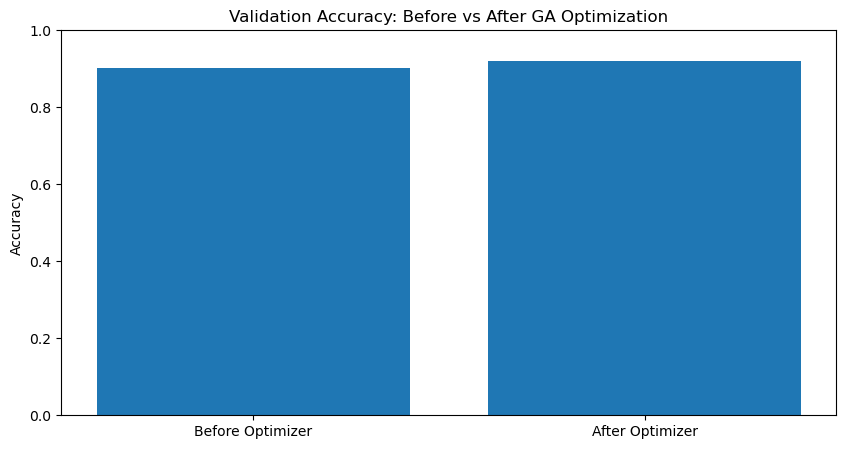

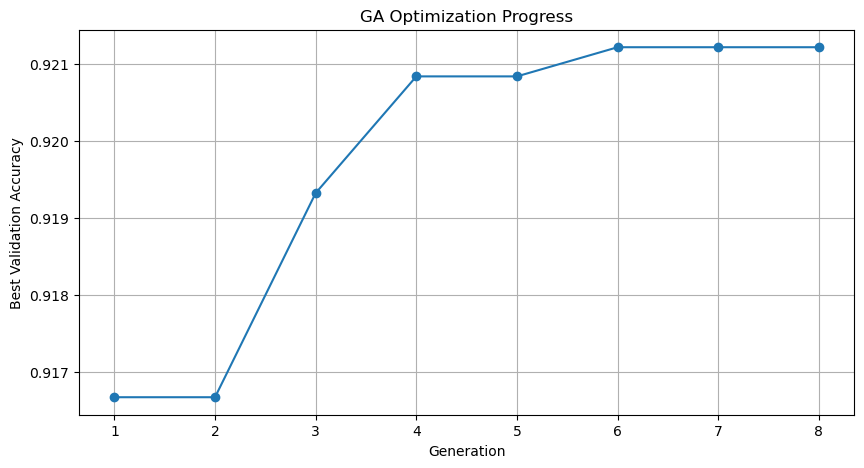

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# ============================
# Load Data
# ============================
df = pd.read_csv(r"D:\AI Engineering\Level 3\AI-Based Programming\Project\df_clean.csv")
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# Genetic Algorithm Settings
# ============================
POP_SIZE = 10
N_GEN    = 8
MUT_RATE = 0.3
CX_RATE  = 0.6

# ============================
# Parameter Search Space
# ============================
def random_individual():
    return {
        "max_depth": random.randint(2, 8),
        "min_child_weight": random.randint(1, 10),
        "gamma": random.uniform(0, 5),

        "subsample": random.uniform(0.5, 1.0),
        "colsample_bytree": random.uniform(0.5, 1.0),

        "reg_alpha": random.uniform(0, 5),
        "reg_lambda": random.uniform(0, 5),

        "learning_rate": random.uniform(0.005, 0.2),
        "n_estimators": random.randint(100, 800)
    }

# ============================
# Fitness Function = Validation Accuracy
# ============================
def evaluate(ind):
    model = XGBClassifier(
        max_depth=ind["max_depth"],
        min_child_weight=ind["min_child_weight"],
        gamma=ind["gamma"],
        subsample=ind["subsample"],
        colsample_bytree=ind["colsample_bytree"],
        reg_alpha=ind["reg_alpha"],
        reg_lambda=ind["reg_lambda"],
        learning_rate=ind["learning_rate"],
        n_estimators=ind["n_estimators"],
        objective="multi:softprob",
        num_class=len(y.unique()),
        eval_metric="merror",
        random_state=42
    )

    model.fit(X_train, y_train, verbose=False)

    train_preds = model.predict(X_train)
    val_preds   = model.predict(X_val)

    train_acc = accuracy_score(y_train, train_preds)
    val_acc   = accuracy_score(y_val, val_preds)

    return train_acc, val_acc

# ============================
# Before Optimizer Model
# ============================
base_model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=7,
    gamma=2,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_alpha=2,
    reg_lambda=5,
    objective="multi:softprob",
    num_class=len(y.unique()),
    eval_metric="merror",
    random_state=42
)
base_model.fit(X_train, y_train)

base_train_acc = accuracy_score(y_train, base_model.predict(X_train))
base_val_acc   = accuracy_score(y_val, base_model.predict(X_val))

print("\n=== BEFORE OPTIMIZER ===")
print("Train Accuracy:", base_train_acc)
print("Val Accuracy  :", base_val_acc)
print("========================\n")

# ============================
# Run Genetic Algorithm
# ============================
population = [random_individual() for _ in range(POP_SIZE)]
history_val = []  # save val acc per generation

for gen in range(N_GEN):
    print(f"\n=== Generation {gen+1} ===")

    scores = []
    for ind in population:
        train_acc, val_acc = evaluate(ind)
        scores.append((val_acc, ind))
        print(f"Train={train_acc:.4f}, Val={val_acc:.4f} → {ind}")

    scores.sort(reverse=True, key=lambda x: x[0])
    best_val_acc_gen = scores[0][0]
    history_val.append(best_val_acc_gen)

    population = [ind for (_, ind) in scores[:POP_SIZE//2]]

    children = []
    while len(children) + len(population) < POP_SIZE:
        p1, p2 = random.sample(population, 2)

        # crossover
        child = {}
        for key in p1:
            child[key] = p1[key] if random.random() < 0.5 else p2[key]

        # mutation
        if random.random() < MUT_RATE:
            key = random.choice(list(child.keys()))
            child[key] = random_individual()[key]

        children.append(child)

    population.extend(children)

# ============================
# Best Individual
# ============================
best_acc, best_params = scores[0]

print("\n==============================")
print(" BEST PARAMS FOUND BY GA ")
print("==============================")
print(best_params)
print("Best Validation Accuracy:", best_acc)
print("==============================\n")

# ============================
# Train Final Model with Best Params
# ============================
best_model = XGBClassifier(
    **best_params,
    objective="multi:softprob",
    num_class=len(y.unique()),
    eval_metric="merror",
    random_state=42
)

best_model.fit(X_train, y_train)
final_train_acc = accuracy_score(y_train, best_model.predict(X_train))
final_val_acc   = accuracy_score(y_val, best_model.predict(X_val))

print("\n=== AFTER OPTIMIZER ===")
print("Train Accuracy:", final_train_acc)
print("Val Accuracy  :", final_val_acc)
print("========================\n")

# ============================
# Visualization Before vs After
# ============================

plt.figure(figsize=(10,5))

plt.bar(["Before Optimizer", "After Optimizer"],
        [base_val_acc, final_val_acc])

plt.title("Validation Accuracy: Before vs After GA Optimization")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

plt.show()

# Plot GA evolution
plt.figure(figsize=(10,5))
plt.plot(range(1, N_GEN+1), history_val, marker='o')
plt.title("GA Optimization Progress")
plt.xlabel("Generation")
plt.ylabel("Best Validation Accuracy")
plt.grid()
plt.show()

In [2]:
# ============================
# Save Optimized Model (Pickle)
# ============================
import pickle

model_path = r"D:\AI Engineering\Level 3\AI-Based Programming\Project\best_xgb_optimized.pkl"

with open(model_path, "wb") as f:
    pickle.dump(best_model, f)

print(f"Optimized model saved successfully → {model_path}")


Optimized model saved successfully → D:\AI Engineering\Level 3\AI-Based Programming\Project\best_xgb_optimized.pkl
